In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import boxcox1p
from sklearn import preprocessing

plt.style.use('ggplot')

In [2]:
data = pd.read_csv("feature_HYJ.csv")
data_scaled = pd.DataFrame()

In [3]:
data.columns

Index([u'Id', u'source', u'SalePrice', u'OpenPorchSF', u'OverallCond',
       u'OverallQual', u'PavedDrive', u'PoolArea', u'PoolQC', u'RoofMatl',
       u'RoofStyle', u'SaleCondition', u'SaleType', u'ScreenPorch', u'Street',
       u'TotRmsAbvGrd', u'TotalBsmtSF', u'Utilities', u'WoodDeckSF',
       u'YearBuilt', u'YearRemodAdd', u'YrSold'],
      dtype='object')

In [4]:
# Add three columns to data_scaled
data_scaled["Id"] = data["Id"]
data_scaled["source"] = data["source"]
data_scaled["SalePrice"] = data["SalePrice"]

# OpenPorchSF
Open porch area in square feet

In [5]:
np.sum(data['OpenPorchSF'].isnull()) # No missing value

0

In [6]:
data['OpenPorchSF'].describe()

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

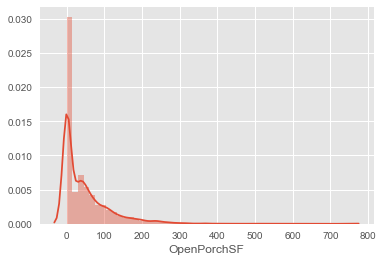

In [7]:
# Check the distribution 
sns.distplot(data["OpenPorchSF"])

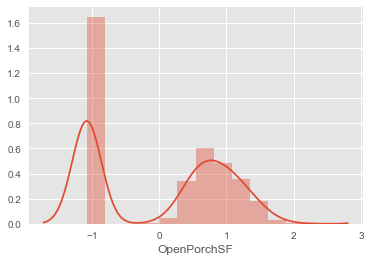

In [8]:
# Box-cox transform
lam = 0.05
data_scaled["OpenPorchSF"] = preprocessing.scale(boxcox1p(data["OpenPorchSF"], lam))

# Check the new distribution
sns.distplot(data_scaled["OpenPorchSF"])

# OverallCond
Rates the overall condition of the house

In [9]:
np.sum(data['OverallCond'].isnull()) # No missing values

0

In [10]:
data['OverallCond'].describe() # This feature is in fact ordinal, but it is read as numerical ones in pandas

count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [11]:
data_scaled["OverallCond"] = data["OverallCond"]

# OverallQual
Rates the overall material and finish of the house

In [12]:
np.sum(data['OverallQual'].isnull()) # No missing value

0

In [13]:
data['OverallQual'].describe() # This feature is in fact ordinal, but it is read as numerical ones in pandas

count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [14]:
data_scaled["OverallQual"] = data["OverallQual"]

# PavedDrive
Paved driveway(Y:Paved; P: Partial Pavement; N:Dirt/Gravel)

In [15]:
np.sum(data['PavedDrive'].isnull()) # No missing value

0

In [16]:
data['PavedDrive'].describe()

count     2919
unique       3
top          Y
freq      2641
Name: PavedDrive, dtype: object

In [17]:
data_scaled["PavedDrive"] = data["PavedDrive"]

# PoolArea

In [18]:
np.sum(data['PoolArea'].isnull())

0

In [19]:
data["PoolArea"].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

In [20]:
# Only 13 houses have pools
data['PoolArea'][data['PoolArea'] > 0]

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
1974    144
2420    368
2503    444
2573    228
2599    561
2710    800
Name: PoolArea, dtype: int64

In [21]:
data_scaled["PoolArea"] = data["PoolArea"] / 800

# PoolQC

In [22]:
# The quality of pool No. 2420, 2503, 2599 are missing
data["PoolQC"][data["PoolQC"].isnull() == False]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
1974    Ex
2573    Ex
2710    Gd
Name: PoolQC, dtype: object

In [23]:
# Label "PoolQC" as "Good" or "None
data.loc[data['PoolArea'] > 0, 'PoolQC'] = "Good"
data["PoolQC"] = data["PoolQC"].fillna("None")

In [24]:
np.sum(data["PoolQC"].isnull())

0

In [25]:
data_scaled["PoolQC"] = data["PoolQC"]

# RoofMatl
Roof material

In [26]:
np.sum(data["RoofMatl"].isnull()) # No missing value

0

In [27]:
data_scaled["RoofMatl"] = data["RoofMatl"]

# RoofStyle
Type of roof

In [28]:
np.sum(data["RoofStyle"].isnull()) # No missing value

0

In [29]:
data_scaled["RoofStyle"] = data["RoofStyle"]

# SaleType

In [ ]:
#Type of sale:
#        WD  Warranty Deed - Conventional
#       CWD  Warranty Deed - Cash
#       VWD  Warranty Deed - VA Loan
#       New  Home just constructed and sold
#       COD  Court Officer Deed/Estate
#       Con  Contract 15% Down payment regular terms
#       ConLw Contract Low Down payment and low interest
#       ConLI Contract Low Interest
#       ConLD Contract Low Down
#       Oth Other

In [30]:
np.sum(data["SaleType"].isnull())

1

(array([  1.00000000e+00,   8.70000000e+01,   1.20000000e+01,
          5.00000000e+00,   2.60000000e+01,   9.00000000e+00,
          8.00000000e+00,   2.39000000e+02,   7.00000000e+00,
          2.52500000e+03]),
 array([-1. , -0.1,  0.8,  1.7,  2.6,  3.5,  4.4,  5.3,  6.2,  7.1,  8. ]),
 <a list of 10 Patch objects>)

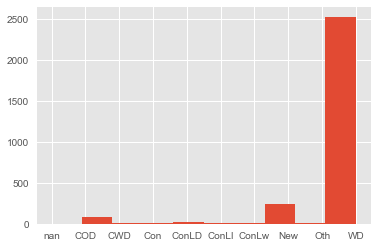

In [31]:
plt.hist(data["SaleType"])

In [32]:
data["SaleType"] = data["SaleType"].fillna("WD")

In [33]:
np.sum(data["SaleType"].isnull())

0

In [34]:
feature = "SaleType"
data_scaled[feature] = data[feature]

# ScreenPorch
Screen porch area in square feet

In [35]:
np.sum(data["ScreenPorch"].isnull()) # No missing value

0

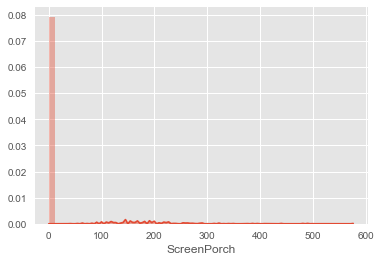

In [36]:
feature = "ScreenPorch"
# Check the distribution 
sns.distplot(data[feature])

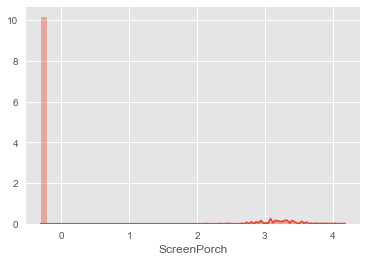

In [37]:
# Box-cox transform
lam = 0.05
data_scaled[feature] = preprocessing.scale(boxcox1p(data[feature], lam))

# Check the new distribution
sns.distplot(data_scaled[feature]) # Doesn't work

# Street
Type of road access to property:
       Grvl	Gravel	
       Pave	Paved

In [38]:
np.sum(data["Street"].isnull()) # No missing value

0

In [39]:
feature = "Street"
data_scaled[feature] = data[feature]

# TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

In [40]:
np.sum(data["TotRmsAbvGrd"].isnull()) # No missing value

0

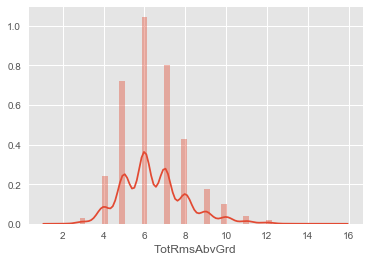

In [41]:
feature = "TotRmsAbvGrd"
# Check the distribution 
sns.distplot(data[feature])

In [42]:
# The type of feature is int, I don't want to scaled it
data_scaled[feature] = data[feature]

# TotalBsmtSF
Total square feet of basement area

In [43]:
np.sum(data["TotalBsmtSF"].isnull()) # One missing value

1

In [44]:
data["TotalBsmtSF"].describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [45]:
# Seems like this house do not have basement
data["TotalBsmtSF"] = data["TotalBsmtSF"].fillna(0)

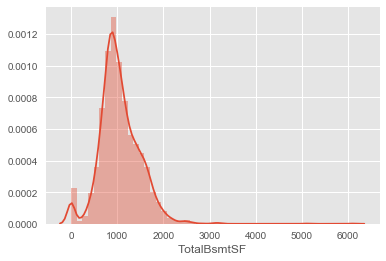

In [46]:
feature = "TotalBsmtSF"
# Check the distribution 
sns.distplot(data[feature])

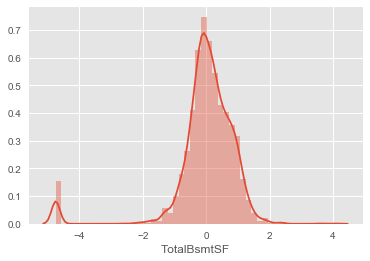

In [53]:
# Box-cox transform
lam = 0.3
data_scaled[feature] = preprocessing.scale(boxcox1p(data[feature], lam))

# Check the new distribution
sns.distplot(data_scaled[feature])

# Utilities

In [54]:
#Type of utilities available:
#       AllPub All public Utilities (E,G,W,& S)	
#       NoSewr Electricity, Gas, and Water (Septic Tank)
#       NoSeWa Electricity and Gas Only
#       ELO Electricity only

In [55]:
np.sum(data["Utilities"].isnull())

2

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.91600000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

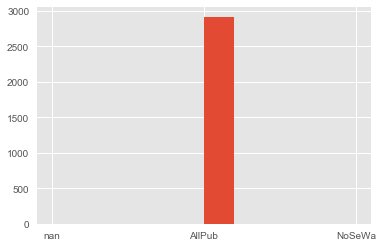

In [56]:
plt.hist(data["Utilities"])

In [57]:
np.sum(data["Utilities"] == "AllPub")

2916

In [58]:
data["Utilities"] = data["Utilities"].fillna("AllPub")

In [59]:
np.sum(data["Utilities"].isnull())

0

In [60]:
data_scaled["Utilities"] = data["Utilities"]

# WoodDeckSF
Wood deck area in square feet

In [43]:
np.sum(data["WoodDeckSF"].isnull()) # No missing value

0

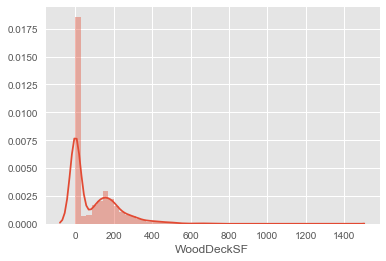

In [61]:
feature = "WoodDeckSF"
# Check the distribution 
sns.distplot(data[feature])

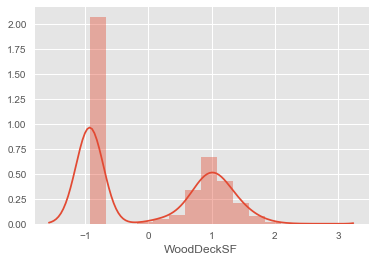

In [65]:
# Box-cox transform
lam = 0.2
data_scaled[feature] = preprocessing.scale(boxcox1p(data[feature], lam))

# Check the new distribution
sns.distplot(data_scaled[feature])

# YearBuilt

In [44]:
np.sum(data["YearBuilt"].isnull())

0

In [68]:
data["YearBuilt"].describe()

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [66]:
data_scaled["YearBuilt"] = data["YearBuilt"]

# YearRemodAdd

In [67]:
np.sum(data["YearRemodAdd"].isnull()) # No missing value

0

In [70]:
data["YearRemodAdd"].describe()

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [69]:
data_scaled["YearRemodAdd"] = data["YearRemodAdd"]

# YrSold

In [71]:
np.sum(data["YrSold"].isnull()) # No missing value

0

In [72]:
data["YrSold"].describe()

count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [73]:
data_scaled["YrSold"] = data["YrSold"]

In [75]:
# Save data
data.to_csv("data_fillna_HYJ.csv", index=False)
data_scaled.to_csv("data_fillna_scaled_HYJ.csv", index=False)